# Energy balance models I

Let's first consider the radiation balance in a circumpolar band bounded by latitudes $\phi$ and $\phi + \delta\phi$, as in the figure below:

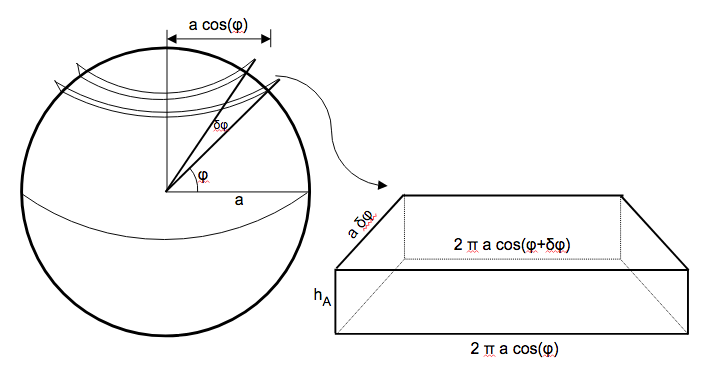

Defining the east-west box length as $L(\phi) = 2\pi a \cos\phi$, the southern edge has length $L(\phi)$ and the northern edge is a little shorter, with length $L(\phi + \delta\phi)$.  The north-south width is $\delta y = a\, \delta\phi$, and the height is the height of the atmosphere, $h_A$.  

**A one-layer greenhouse model with a swampy ground layer**

The incident solar radiation at latitude $\phi$ is $S(\phi)$ (W/m$^2$).  \[In the case of a planetary axis with no obliquity (ecliptic angle 0), the incident radiation is $S(\phi) = \cos(\phi)/\pi$.\]  The absorbed radiation is therefore $F_S = (1-\alpha)S$, where the albedo $\alpha$ is a function of both $\phi$ and the temperature.

We know from class (e.g. Marshall and Plumb figure 5.5) that the integral of the absorbed minus emitted radiation over 
the sphere vanishes, but at a given latitude they don't balance.  Before introducing atmopheric transport, let's allow an imbalance by considering that the ground has to heat up --- it's not instantaneously the right temperature.  

For simplicity we assume the planet is covered by a shallow layer of water, so our ground is really water.  The depth of this layer is $h_G = 100$ m, its density is $\rho_G = 1000$ kg/m$^3$, and so the total mass of the watery ground in our latitude-band box is 

$$M_G = \rho_W h_W \times [\text{lateral box area}] = \rho_G h_G \, \delta y\, L(\phi)$$

where here we've assume the lateral area is a square and ignore the slight difference in lengths of the front and back sides of the box. 


Given the heat capacity of water, $c_G = 4000$ J/(kg K), and assuming a current temperature $T_G$, the total energy in the water layer in our box is 

$$E_G = c_G T_G M_G = c_G \rho_G h_G \, \delta y \, L(\phi) \, T_G.$$

If there is an energy flux $F$ (energy per time per area) passing vertically into or out of the box, the rate of change of temperature would be given by setting the flux equal to $[\text{lateral area}]^{-1}dE_G/dt$, or 

$$ \gamma_G \frac{dT_G}{dt} = F$$

where I've defined $\gamma_G = c_G\rho_G h_G$ for convenience.


A difference in incoming and outgoing radiation in our box will result in an increase or decrease of the ground energy.  Let's assume a one-layer leaky greenhouse model (M & P section 2.3.2), with absorptivity $\epsilon$, which is the fraction of the IR radiating upward from the ground that is absorbed by the atmosphere.  We'll also assume that the atmosphere, with temperature $T_A$, is instantaneously in balance, so we set the flux coming in equal to the flux going out:

$$\epsilon \sigma T_G^4 = 2\sigma T_A^4$$.

At the ground, we allow a difference in the fluxes, so using the formulation above, we have

$$\gamma_G\frac{dT_G}{dt} = (1-\alpha)S + \sigma T_A^4 - \sigma T_G^4$$


Eliminating $T_A$ and replacing $T_G$ by simply $T$, we have

$$\boxed{\gamma_G\frac{dT}{dt} = F = (1-\alpha)S - \beta T^4}, 
\quad\text{where}\quad \beta = \left(1-\frac{\epsilon}{2}\right)\sigma$$
is defined for convenience.  

Note that $0<\epsilon \le 1$, so the term in large parentheses is positive.  Setting $\epsilon=1$ recovers the basic one-layer greenhouse model.  Setting the time derivative equal to 0 (the equilibrium solution) recovers the solution for the ground temperature in M & P (2-13) but for latitudinally-varying solar radiation.

**Temperature-dependent albedo**

Now consider what happens if we assume $\alpha$ depends on temperature.  If the ground is water, then below freezing it should turn to ice, with a higher albedo than liquid water.  But let's assume there's a range of albedos for temperature near freezing (in a loose way, considering lots of other ways albedo changes, e.g. snow is higher albedo than ice, and at a given latitude, there may be a range of frozen and unfrozen parts).  Specifically, we'll take

$$\alpha(T) = \begin{cases}\alpha_l, & T<T_l\\ \alpha_l + m(T-T_l), & T_l\le T < T_h\\
\alpha_h, & T\ge T_h\end{cases}
\quad\quad m = \frac{\alpha_h-\alpha_l}{T_h-T_l} < 0$$

where the subscripts $l$ and $h$ refer to low and high temperature, respectively.  Note that the slope $m$ in the linearly-varying part is negative, since $\alpha_l > \alpha_h$.  Let's look at $\alpha(T)$ and $F(T)$ at a particular latitude $\phi=.67$ because $S(.67) = S_0 \cos(.67)/\pi \approx S_0/4$, so this is the latitude that receives the global average incident radiation.

Text(273,-120,'$T_h$')

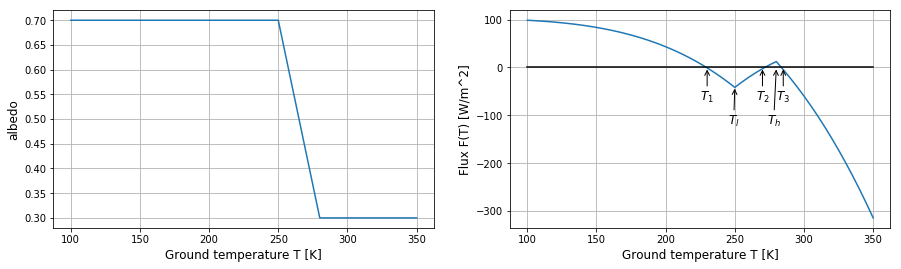

In [132]:
import matplotlib.pyplot as plt
import numpy as np

TL = 250
TH = 280
alphL = .7
alphH = .3
sigma = 5.67e-8
S0 = 1367
absorp = .7   # epsilon in leaky greenhouse model
beta = (1-absorp/2)*sigma

def albedo(T):
    return (alphL*(T<TL)+alphH*(T>TH)+(alphL+(alphH-alphL)*(T-TL)/(TH-TL))*(T>=TL)*(T<=TH))

def S(phi):
    return S0*np.cos(phi)/np.pi

def F(T,phi):
    return (1-albedo(T))*S(phi) - beta*T**4

T = np.linspace(100,350,151)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,4))
ax1.plot(T,albedo(T))
ax1.grid()
ax1.set_xlabel('Ground temperature T [K]',fontsize=12)
ax1.set_ylabel('albedo',fontsize=12)

ax2.plot(T,F(T,.67))  # plot at phi = .67, because S_0*cos(.67)/pi = S_0/4
ax2.plot(T,np.zeros(T.shape),'k')
ax2.grid()
ax2.set_xlabel('Ground temperature T [K]',fontsize=12)
ax2.set_ylabel('Flux F(T) [W/m^2]',fontsize=12)
ax2.annotate("$T_1$", xy=(230, 0), xytext=(225, -70),arrowprops=dict(arrowstyle="->"),fontsize=12)
ax2.annotate("$T_2$", xy=(270, 0), xytext=(265, -70),arrowprops=dict(arrowstyle="->"),fontsize=12)
ax2.annotate("$T_3$", xy=(285, 0), xytext=(280, -70),arrowprops=dict(arrowstyle="->"),fontsize=12)
ax2.annotate("$T_l$", xy=(250, -40), xytext=(245, -120),arrowprops=dict(arrowstyle="->"),fontsize=12)
ax2.annotate("$T_h$", xy=(280, 0), xytext=(273, -120),arrowprops=dict(arrowstyle="->"),fontsize=12)


Where the flux $F(T)$ is negative, $dT/dt < 0$, and so an initial temperature in that range will decrease.  Likewise where $F(T)$ is positive, the temperature will increase.  In the above case, the flux crosses the 0-axis three times, at roughly $T_1=230K$, $T_2=270K$ and $T_3=285K$ (marked with arrows).  So for $T<T_1$, the temperature will increase, and for $T_1 < T < T_2$, the temperature will decrease.  Either way, it will eventually reach the $F=0$ point $T =T_1$.  This is therefore a stable equilibrium solution:  if the solution is perturbed away from this point will return to 230K.  The same logic will apply to $T_3$, since $F>0$ just to its left, and $F<0$ just to its right.  The third 0-crossing at $T_2$, by contrast, is unstable:  for temperatures a bit cooler than $T_2$, the flux $F<0$ and the temperature decreases further, eventually hitting $T_1$, where it stays. Slightly warmer-than-$T_2$ initial temperatures will increase further, eventually hitting $T_3$, where the system stays.  This is a bi-stable system, with two stable solutions toward which all other intial states evolve, and the critical temperature $T_{crit}=T_2$ determines which way it will go.

We can find the zeros of $F$ below $T_l$ and above $T_h$ analytically: they are $T_1 =  [(1-\alpha_l)S/\beta]^{1/4}$ and $T_3 = [(1-\alpha_h)S/\beta]^{1/4}$.  The third 0 is trickier, since it involves solving the quartic
$$0 = C + |m|S T - \beta T^4,$$
where $C = (1-\alpha_l - |m|T_l)S(\phi)$ depends only on $\phi$.   

Note that the stability of those three points can be determined by the derivative of the function at those points:  $dF/dT<0$ at the two stable equilibrium points $T_1$ and $T_3$, while $dF/dT>0$ at the critical temperature, $T_2$.  Considering the expressions for $dT/dt$ and $\alpha$ above, you can compute $dF/dT$.  You'll find that 

$$dF/dT = \begin{cases} -4\beta T^3, & T\le T_l ~\text{and}~ T>T_h\\
                        |m|S - 4\beta T^3, & T_l < T \le T_h
          \end{cases}$$
          
So it is always negative below $T_l$ and above $T_h$, but in the range $T_l < T \le T_h$ the sign seems to depend on the value of $|m|S(\phi)$, which is decreasing with increasing $\phi$.  A moment's thought will convince you that if there is a 0 between $T_l$ and $T_h$, the derivative there must be positive. So if $T_2$ exists, it's unstable. 

And we can also see when $T_2$ will disappear. Consider the peak in $F$ at $T_h$: that value is $F(T_h) = (1-\alpha_h)S_0/\pi\,\cos\phi - \beta T_h^4$.  Setting $F(T_h) = 0$ and solving for $\phi$ gives

$$\cos\phi_{crit} = \frac{\pi \beta T_h^4}{S_0(1-\alpha_h)},$$

At latitude $\phi_{crit}$ the zeros $T_2$ and $T_3$ merge;  at higher latitudes, there's just one zero, $T_1$, so no matter what temperature you start with, above this critical latitude, the temperature will evolve to $T_1$.  

So the function $F$ is really $F(T,\phi)$.  Let's see what its 0's look like:

Text(0.76,110,'$\\phi_{crit}$')

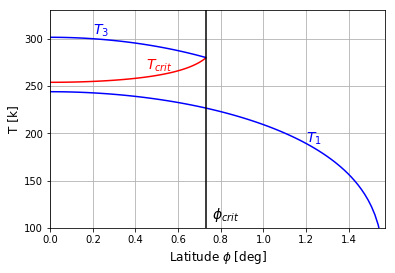

In [133]:
from scipy import optimize as op

phicrit = np.arccos((beta*np.pi*TH**4)/(S0*(1-alphH)))

def T1(phi): 
    T1 = ((1-alphL)*S(phi)/beta)**(1/4)
    T1[np.where(T1>TL)]=np.nan  # set it to NaN outside its temperature range
    return T1
    
def T3(phi):
    T3 = ((1-alphH)*S(phi)/beta)**(1/4)
    T3[np.where(T3<TH)]=np.nan  # set it to NaN outside its temperature range
    return T3

def Tcrit(phi):
    foo = np.zeros(phi.size)
    j=0
    for ph in phi:   
        if ph < phicrit:    # for latitudes where Tcrit exists...
            foo[j] = op.bisect(F,TL,TH, args=(ph,))  # ... use a bisection method to find a 0 between TL and TH
        else:
            foo[j] = np.nan  # otherwise set it to NaN
        j += 1
    return foo

phi = np.linspace(0,np.pi/2,100)
Tcrit(phi)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(phi,T1(phi),'b')
ax.plot(phi,Tcrit(phi),'r')
ax.plot(phi,T3(phi),'b')
ax.plot(phicrit*np.ones(T.shape),T,'k')
ax.grid()
ax.axis([0, np.pi/2, 100, 330])
ax.set_ylabel('T [k]',fontsize=12)
ax.set_xlabel('Latitude $\phi$ [deg]',fontsize=12)
ax.annotate("$T_{crit}$", xy=(.45, 268),fontsize=14,color='r')
ax.annotate("$T_1$", xy=(1.2, 190),fontsize=14,color='b')
ax.annotate("$T_3$", xy=(.2, 305),fontsize=14,color='b')
ax.annotate("$\phi_{crit}$", xy=(.76, 110),fontsize=14,color='k')

The curve on the the bottom is $T_1(\phi)$ (stable branch), the middle curve is $T_{crit}(\phi)$ (unstable branch) and the curve on the top is $T_3(\phi)$ (stable branch).  The latter two merge and disappear when both hit $T_h = 280K$ , and then disappear at latitudes higher $\phi_{crit}$, as predicted. North of this latitude, there is only one solution to the equation, and it's the cold branch $T=T_1$. 

We have shown that the equilibrium solution for the ground temperature $T_{equil}(\phi) = T(\phi,t\rightarrow\infty)$ is a known function of its initial temperature $T_{init}(\phi) = T(\phi,0)$:  for latitudes $\phi<\phi_{crit}$, an initial ground temperature $T < T_{crit}$ (no matter how small) will evolve to $T_{equil} = T_1$ and stay there;  any initial temperature $T > T_{crit}$ will evolve to $T = T_3$ and stay there.  At latitudes $\phi>\phi_{crit}$, all initial temperatures will evolve to the cold stable temperature, $T_1$.

In EBM2 we'll figure out how to **include atmospheric transport**